In [68]:
import pandas as pd
import numpy as np
import os
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from google.colab import files
uploaded=files.upload()

Saving traffic_sign.csv to traffic_sign.csv


In [34]:
df=pd.read_csv(io.BytesIO(uploaded['traffic_sign.csv']))

In [35]:
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49.0,16.0,Test/00000.png
1,42,45,5,5,36,40.0,1.0,Test/00001.png
2,48,52,6,6,43,47.0,38.0,Test/00002.png
3,27,29,5,5,22,24.0,33.0,Test/00003.png
4,60,57,5,5,55,52.0,11.0,Test/00004.png


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51882 entries, 0 to 51881
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Width    51882 non-null  object 
 1   Height   51882 non-null  int64  
 2   Roi.X1   51882 non-null  int64  
 3   Roi.Y1   51882 non-null  int64  
 4   Roi.X2   51882 non-null  object 
 5   Roi.Y2   51839 non-null  float64
 6   ClassId  51839 non-null  float64
 7   Path     51839 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 3.2+ MB


In [ ]:
df.describe()

,Height,Roi.X1,Roi.Y1,Roi.Y2,ClassId
count,51882.000000,51882.000000,51882.000000,51839.000000,51839.000000
mean,50.313269,5.994834,5.962742,44.735624,15.730570
std,23.267132,1.499514,1.404277,22.099631,11.997481
min,0.000000,0.000000,0.000000,20.000000,0.000000
25%,35.000000,5.000000,5.000000,30.000000,5.000000
50%,43.000000,6.000000,6.000000,38.000000,12.000000
75%,58.000000,6.000000,6.000000,52.000000,25.000000
max,232.000000,23.000000,20.000000,212.000000,42.000000


In [37]:
df.isnull()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
51877,False,False,False,False,False,True,True,True
51878,False,False,False,False,False,True,True,True
51879,False,False,False,False,False,True,True,True
51880,False,False,False,False,False,True,True,True


In [148]:
df.fillna

<bound method DataFrame.fillna of             Width  Height  Roi.X1  Roi.Y1 Roi.X2  Roi.Y2  ClassId  \
0              53      54       6       5     48    49.0     16.0   
1              42      45       5       5     36    40.0      1.0   
2              48      52       6       6     43    47.0     38.0   
3              27      29       5       5     22    24.0     33.0   
4              60      57       5       5     55    52.0     11.0   
...           ...     ...     ...     ...    ...     ...      ...   
51877  Meta/5.png       5       1       0   3.29     NaN      NaN   
51878  Meta/6.png       6       1       3    3.3     NaN      NaN   
51879  Meta/7.png       7       1       0   3.29     NaN      NaN   
51880  Meta/8.png       8       1       0   3.29     NaN      NaN   
51881  Meta/9.png       9       1       0   3.25     NaN      NaN   

                 Path  
0      Test/00000.png  
1      Test/00001.png  
2      Test/00002.png  
3      Test/00003.png  
4      Test/00004

In [ ]:
df.dropna()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49.0,16.0,Test/00000.png
1,42,45,5,5,36,40.0,1.0,Test/00001.png
2,48,52,6,6,43,47.0,38.0,Test/00002.png
3,27,29,5,5,22,24.0,33.0,Test/00003.png
4,60,57,5,5,55,52.0,11.0,Test/00004.png
...,...,...,...,...,...,...,...,...
51834,52,56,5,6,47,51.0,42.0,Train/42/00042_00007_00025.png
51835,56,58,5,5,51,53.0,42.0,Train/42/00042_00007_00026.png
51836,58,62,5,6,53,57.0,42.0,Train/42/00042_00007_00027.png
51837,63,69,5,7,58,63.0,42.0,Train/42/00042_00007_00028.png


In [150]:
from scipy.stats import stats
z=np.abs(stats.zscore(df['Height']))
print(z)
threshould=0.18
sample_outerliers=np.where(z<threshould)
sample_outerliers

[0.15845386 0.22836161 0.07249487 ... 1.86158248 1.81860299 1.77562349]


(array([    0,     2,     8, ..., 51831, 51832, 51833]),)

In [36]:
df[['Height']].value_counts()

Height
33        1816
31        1781
32        1765
34        1748
36        1721
          ... 
20           1
21           1
22           1
23           1
232          1
Length: 206, dtype: int64

In [ ]:
df[['Width']].value_counts()

Width      
31             1798
30             1760
33             1758
34             1745
32             1724
               ... 
Meta/11.png       1
Meta/12.png       1
Meta/13.png       1
Meta/14.png       1
Meta/9.png        1
Length: 240, dtype: int64

In [ ]:
df[['Roi.X1']].value_counts()

Roi.X1
6         22865
5         21314
7          2721
8          1747
9          1092
10          749
11          513
12          312
13          202
14          129
15           76
16           50
17           29
1            26
0            16
18           12
19           10
20            6
4             5
22            3
3             2
2             2
23            1
dtype: int64

In [ ]:
df[['Roi.Y1']].value_counts()

Roi.Y1
6         23168
5         21276
7          2715
8          1745
9          1038
10          724
11          487
12          312
13          156
14          109
15           51
0            30
16           26
17           17
18            9
1             8
19            5
3             4
2             1
20            1
dtype: int64

In [ ]:
df[['Roi.X2']].value_counts()

Roi.X2
26        1825
25        1794
29        1764
28        1746
27        1712
          ... 
216          1
212          1
207          1
202          1
None         1
Length: 221, dtype: int64

In [ ]:
df[['Roi.Y2']].value_counts()

Roi.Y2
28.0      1815
26.0      1800
29.0      1750
27.0      1745
31.0      1730
          ... 
195.0        1
199.0        1
201.0        1
210.0        1
212.0        1
Length: 173, dtype: int64

In [ ]:
df[['ClassId']].value_counts()

ClassId
2.0        3000
1.0        2940
13.0       2880
12.0       2790
38.0       2760
10.0       2670
4.0        2640
5.0        2490
25.0       1980
9.0        1950
7.0        1890
3.0        1860
8.0        1860
11.0       1740
18.0       1590
35.0       1590
17.0       1470
31.0       1050
14.0       1050
33.0        899
15.0        840
26.0        780
28.0        690
23.0        660
30.0        600
6.0         570
16.0        570
34.0        540
22.0        510
36.0        510
20.0        450
40.0        450
21.0        420
39.0        390
24.0        360
29.0        360
42.0        330
32.0        300
27.0        300
41.0        300
37.0        270
19.0        270
0.0         270
dtype: int64

In [ ]:
df.columns 

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

In [ ]:
df.shape

(51882, 8)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


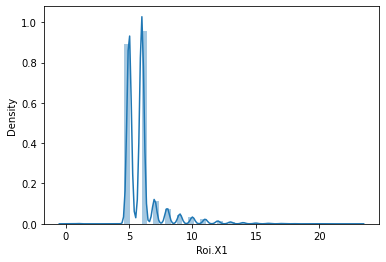

In [39]:
sns.distplot(df['Roi.X1'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


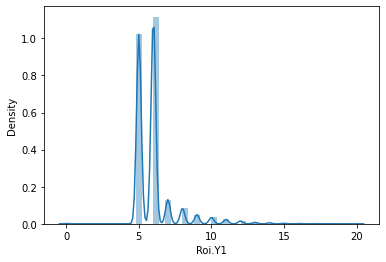

In [41]:
sns.distplot(df['Roi.Y1'])

In [2]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

In [8]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right',
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

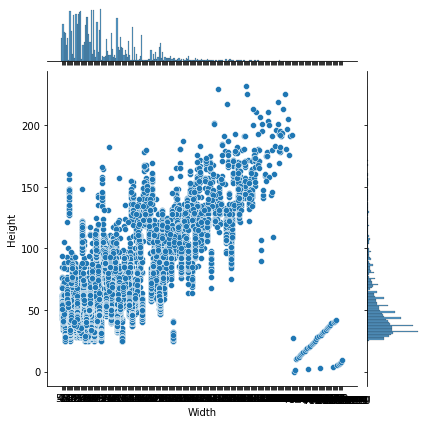

In [43]:
sns.jointplot(x='Width',y='Height',data=df)

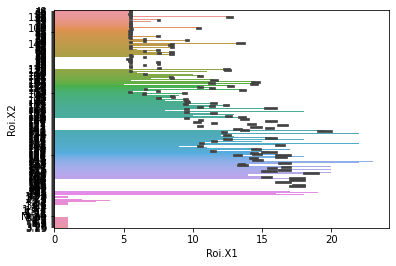

In [49]:
sns.barplot(x='Roi.X1',y='Roi.X2',data=df)

In [167]:
from google.colab import files
uploaded=files.upload()

Saving traffic_sign.png to traffic_sign.png


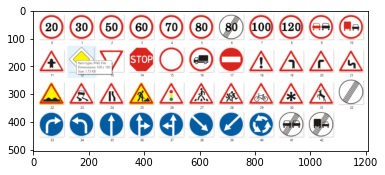

In [172]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('traffic_sign.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

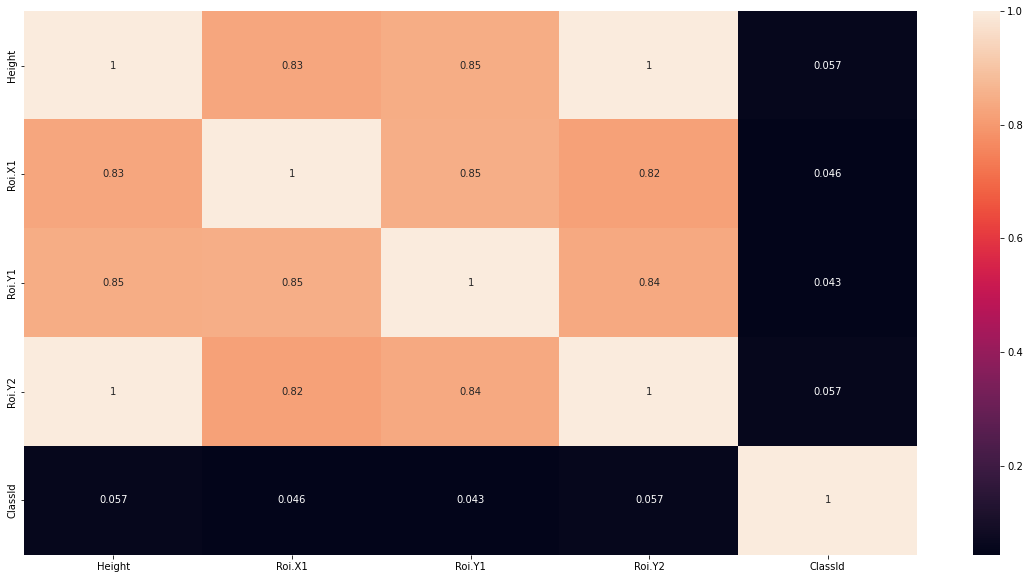

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True)

In [75]:
from sklearn.datasets import make_regression

In [134]:
x,y=make_regression(n_samples=6,n_features=1,noise=25,bias=5)

In [135]:
x.shape,y.shape

((6, 1), (6,))

In [123]:
x

array([[-0.0923982 ],
       [ 0.94426264],
       [-0.71920528],
       [-0.60406624],
       [ 0.23553559],
       [ 0.74690174]])

In [124]:
y

array([ -3.49451258,  66.19917283, -50.73430992, -43.05313486,
        18.19581281,  70.31718028])

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
                                               

((4, 1), (2, 1), (4,), (2,))

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [146]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(x_train,y_train)
r2_score =regressor.score(x_test,y_test)
print(r2_score*100,'%')

87.34933104495627 %
